<h1> <center>LEITURA, VISUALIZAÇÃO E ANÁliSE INICIAL</center> </h1>
<h3> <center>ACCESSO À DADOS OMNI</center> </h3>
<center><img width="700" height="500" src="https://cdn.pixabay.com/photo/2010/12/05/international-space-station-974_1280.jpg"></center>
<center> Data Source: <a href='https://cdaweb.gsfc.nasa.gov/index.html/'>Coordinated Data Analysis Web (CDAWeb)</a> </center>
<center> API Documentation: <a href='https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/'>Package for accessing the Coordinate Data Analysis System (CDAS) web services </a> </center>

#### Para a coleta dos dados é necessária a instalação da API via "pip install cdasws", com isso é possível acessar os dados diretamente do Coordinate Data Analysis System (CDAS) web services.

##### Nesse estudo iremos considerar os dados do observatório _OMNI (1AU IP Data)_, onde serão observados quais datasets estão disponíveis, além das variáveis e instrumentos.
##### Esse observatório destinam-se principalmente a apoiar estudos dos efeitos das variações do vento solar na magnetosfera e na ionosfera. Além disso, abordamos os conjuntos de dados de 1 min ACE de 1998-2000 deslocados usando várias técnicas para a localização do vento solar. 
##### De modo geral, o observatório possui dados combinados, definitivos, FMI por hora, plasma e fluxos de prótons energéticos, deslocados no tempo para a extremidade extera do "choque de arco da Terra" (é formado na frente do "nariz" [Figura 2] da magnetopausa, a camada limite externa da magnetosfera), além de índices solares e magnéticos. 

<center><img width="300" height="300" src="https://cdn.sci.esa.int/documents/34817/35562/1567218262748-CTS26-Image2_large410.jpg"></center>
<center> Figura 2 - Date: 20 June 2006; Depicts: Illustration of Earth's bow shock; Copyright: ESA</a> </center>

##### Assumimos que a direção geocêntrica para o "nariz de choque de proa" é paralela à direção do fluxo do vento solar: 
##### <center> Rt = - |Rt| * V/|V|. <center> 
##### V e |V| são determinados a partir dos valores V corrigidos do desvio fornecidos nos conjuntos de dados de plasma de entrada, mas com 29,8 km/s, a velocidade orbital média da Terra em torno do Sol, adicionada aos seus valores Vy. 
##### Os dados foram disponibilizados por J.H. King, N. Papitashvili (ADNET, NASA GSFC).

### <center> Vamos Começar <center> 

In [1]:
# Importing libraries
#Visualização dos dados
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
#tratamento dos dados
import pylab
import pandas as pd
import datetime
# Criando a decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose
#Bibliotecas para importação dados da Api da NASA
from cdasws import CdasWs
from cdasws import TimeInterval
# Retirar avisos
import warnings
warnings.filterwarnings('ignore')

cdas = CdasWs()


##### O primeiro ponto vai ser observar quais são os datasets disponíveis no observatório, a partir deles podemos ver algumas características gerais. 

In [2]:
datasets = cdas.get_datasets(observatory=['OMNI (1AU IP Data)'])
datasets

[{'Id': 'OMNI2_H0_MRG1HR',
  'Doi': '10.48322/1shr-ht18',
  'SpaseResourceId': 'spase://NASA/NumericalData/OMNI/PT1H',
  'Observatory': ['OMNI (1AU IP Data)'],
  'Instrument': ['IMF, Plasma, Indices, Energetic Proton Flux'],
  'ObservatoryGroup': ['OMNI (Combined 1AU IP Data; Magnetic and Solar Indices)',
   'ACE',
   'Wind',
   'IMP (All)'],
  'InstrumentType': ['Plasma and Solar Wind',
   'Magnetic Fields (space)',
   'Particles (space)',
   'Electric Fields (space)',
   'Activity Indices'],
  'Label': "OMNI Combined, Definitive, Hourly IMF and Plasma Data, and Energetic Proton Fluxes, Time-Shifted to the Nose of the Earth's Bow Shock, plus Solar and Magnetic Indices - J.H. King, N. Papitashvili (ADNET, NASA GSFC)",
  'TimeInterval': {'Start': '1963-01-01T00:00:00.000Z',
   'End': '2022-02-04T23:00:00.000Z'},
  'PiName': 'J.H. King, N. Papitashvili',
  'PiAffiliation': 'ADNET, NASA GSFC',
  'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
  'DatasetLink': [{'

##### A partir da saída do get_datasets(), podemos ver que o observatório disponibiliza 6 datasets diferentes, sendo que, instrumentos que medem o vento solar e o campo magnético (observado do espaço), estão presente em todos eles. Os datasets estão divididos com dados disponibilizados em intervalos de 1 hora, 1 e 5 minutos. A seguir podemos ver os datassests e os tipos de instrumentos de cada um:
* OMNI2_H0_MRG1HR - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)';
    * 'Particles (space)';
    * 'Electric Fields (space)';
    * 'Activity Indices'.
* OMNI_COHO1HR_MERGED_MAG_PLASMA - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)'.
* OMNI_HRO2_1MIN - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)';
    * 'Electric Fields (space)'.
* OMNI_HRO2_5MIN - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)';
    * 'Electric Fields (space)'.
* OMNI_HRO_1MIN - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)';
    * 'Electric Fields (space)'.
* OMNI_HRO_5MIN - 
    * 'Plasma and Solar Wind';
    * 'Magnetic Fields (space)';
    * 'Electric Fields (space)'].

##### A partir disso vamos trabalhar com o datasset OMNI2_H0_MRG1HR, pois ele é o que possui o maior número de instrumentos para analisarmos, além de ser o único que apresenta informações de partículas espaciais.

In [3]:
# Retorna todas as variáveis presentes no dataset OMNI2_H0_MRG1HR, e salva em um pandas dataframe
variaveis_OMINI2 = pd.DataFrame(cdas.get_variables('OMNI2_H0_MRG1HR'))
variaveis_OMINI2

,Name,ShortDescription,LongDescription
0,Rot1800,,Bartels Rotation Number
1,IMF1800,,OMNI ID code for the source spacecraft for tim...
2,PLS1800,,OMNI ID code for the source spacecraft for tim...
3,IMF_PTS1800,,# fine time scale IMF points
4,PLS_PTS1800,,# fine time scale plasma points
5,ABS_B1800,,"1AU IP Average B Field Magnitude, nT, (last cu..."
6,F1800,,1AU IP Magnitude of average field vector (nT)
7,THETA_AV1800,,1AU IP Latitude/Theta of average B vector (deg)
8,PHI_AV1800,,1AU IP Longitude/Phi of average B vector (deg)
9,BX_GSE1800,,"1AU IP Bx (nT), GSE"


##### A cima vemos todas as variáveis disponíveis no datasset OMNI2_H0_MRG1HR, vamos focar nesse estudo nas seguintes informações: 
* Proton_QI1800: Solar wind (magnetic energy density)/(kinetic energy density);
* AP_INDEX1800: ap - 3-hour ap-index (1963/001-2021/349), from NGDC;
* KP1800: Kp - 3-hour Kp*10 (Kp=1-,1,1+ corresponds to 7,10,13), fromNGDC (1963/001-2021/349);
* DST1800: Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2015/001-2017/366), Quick-look Dst (2018/001-2022/009), from WDC Kyoto;
* F10_INDEX1800: F10.7 - Daily 10.7 cm solar radio flux, units: 10**(-22) Joules/second/square-meter/Hertz, from NGDC (1963/001-2022/009);
* R1800: Daily sunspot number V2, from  http://sidc.oma.be/silso/datafiles/ (1963/001-2021/365);
* ABS_B1800: 1AU IP Average B Field Magnitude, nT, (last currently-available OMNI B-field data Dec 20, 2021).

In [4]:
#Definindo o intervalo de tempo a ser buscado, devendo estar dentro do time interval verificado na base de dados
time_intervals = [TimeInterval('2021-01-01T00:00:00Z', '2022-01-01T00:00:00Z')]
variaveis_busca = ['Proton_QI1800','AP_INDEX1800','KP1800','DST1800','F10_INDEX1800','R1800','ABS_B1800']
#Busca o conjunto de dados do dataset OMNI2_H0_MRG1HR, considerando as variáveis de busca da linha de cima, e o time interval definido
status, data_OMNI = cdas.get_data('OMNI2_H0_MRG1HR', variaveis_busca, time_intervals)

In [5]:
#olhando os atributos do dataset OMNI2_H0_MRG1HR de maneira geral, como as informações pertinentes a ele
data_OMNI.attrs

{'Project': ['NSSDC'],
 'Discipline': ['Space Physics>Interplanetary Studies'],
 'Source_name': ['OMNI (1AU IP Data)>Merged 1 Hour Interplantary OMNI data'],
 'Data_type': ['H0>Definitive Hourly'],
 'Descriptor': ['IMF, Plasma, Indices, Energetic Proton Flux'],
 'DATA_VERSION': ['1'],
 'TITLE': ['Near-Earth Heliosphere Data (OMNI)'],
 'Text': ['CDAWeb interface derived data on Wed Feb  9 13:26:00 EST 2022.',
  'Contacts: Tami.J.Kovalick@nasa.gov, Rita.C.Johnson@nasa.gov.',
  ' ',
  'Hourly averaged definitive multispacecraft interplanetary parameters data',
  'OMNI Data Documentation: https://omniweb.gsfc.nasa.gov/html/ow_data.html',
  "Additional data access options available at  SPDF's OMNIWeb Service: https://omniweb.gsfc.nasa.gov/ow.html",
  'COHOWeb-formatted OMNI_M merged magnetic field and plasma data http://cohoweb.gsfc.nasa.gov/',
  'Recent OMNI 1-HR Updates News: https://omniweb.gsfc.nasa.gov/html/ow_news.html'],
 'MODS': ['created August 2003;',
  'conversion to ISTP/IACG CD

##### Agora vamos plotar cada uma das variáveis apenas para observar o comportamento delas no decorrer dos dois primeiros meses de 2021.

In [6]:
# Função para plotar os dados do para datasets criados nos passos anteriores
def plot_graph_dados(varialble_list,data_raw,x_data, time_interval, porcentagem_limy=0.5):
    plt.figure(figsize=(18, 8))
    for val in varialble_list: #Percorrendo a lista de variáveis que serão plotadas
        if 'LABL_PTR_1' in data_raw[val].attrs: #verifica se a variável possui o atributo LABL_PTR_1, se sim,
                                                #Ele possui três componentes e serão plotadas com seus respectivos nomes e unidades
            local_label = data_raw[val].attrs['LABL_PTR_1']
            identificador = []
            #asd = int(data_raw[val].attrs['DIM_SIZES'])+1
            for dimensao in range(0,int(data_raw[val].attrs['DIM_SIZES'])):
                if 'UNITS' in data_raw[val].attrs:
                    identificador.append([str(data_raw[local_label][int(dimensao)])+' ('+data_raw[val].attrs['UNITS']+')'])
                else:
                    identificador.append([str(data_raw[local_label][int(dimensao)])])
            plt.plot(x_data, data_raw[val], label=identificador)
        else:#Caso contrário, a variável possui apenas um componente e será plotada com seu nome e unidade 
            if 'UNITS' in data_raw[val].attrs:                       
                plt.plot(x_data, data_raw[val], 
                        label=data_raw[val].attrs['LABLAXIS']+' ('+data_raw[val].attrs['UNITS']+')')
            else:
                plt.plot(x_data, data_raw[val], 
                        label=data_raw[val].attrs['LABLAXIS'])
        
    plt.xlim(time_interval)#Definindo o intervalo de tempo a ser plotado
    #Definindo o intervalo de valores a ser plotado
    plt.ylim((float(data_raw[val].attrs['SCALEMIN'])*porcentagem_limy 
                if (float(data_raw[val].attrs['SCALEMIN']) > 0) 
                else (-0.2*float(data_raw[val].attrs['SCALEMAX'])*porcentagem_limy)),
             float(data_raw[val].attrs['SCALEMAX'])*porcentagem_limy)
    plt.xlabel('Periodo de tempo')
    plt.ylabel(data_raw.attrs['Data_type'][0])
    plt.title(data_raw.attrs['TITLE'][0])
    # Exibe a legenda e por padrão usa o label de cada plot.
    plt.legend()
    plt.show();

No handles with labels found to put in legend.


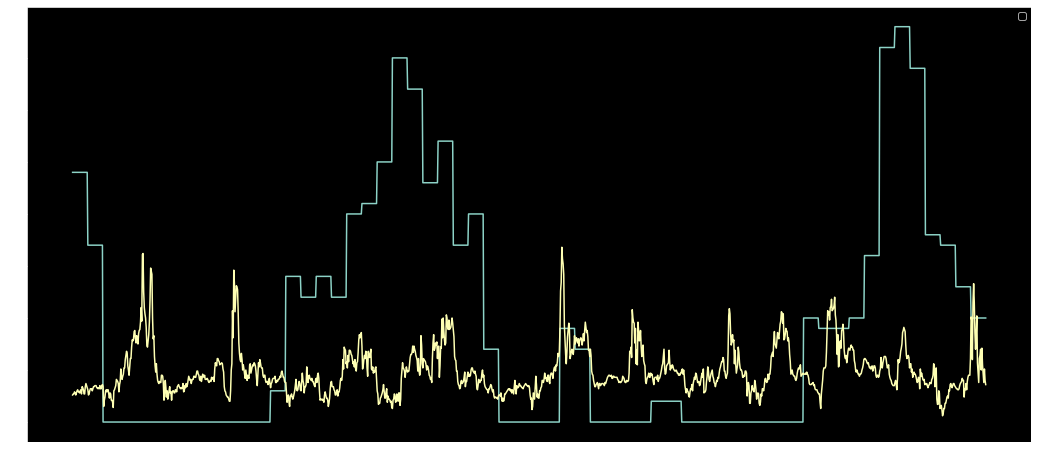

In [113]:
plt.figure(figsize=(18, 8))
#plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[0]][0:1440], label='0')
#plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[1]][0:1440], label='1')
#plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[2]][0:1440])
#plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[3]][0:1440])
#plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[4]][0:1440])
plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[5]][0:1440])
plt.plot(data_OMNI['Epoch_1800'][0:1440], data_OMNI[variaveis_busca[6]][0:1440])
plt.legend()

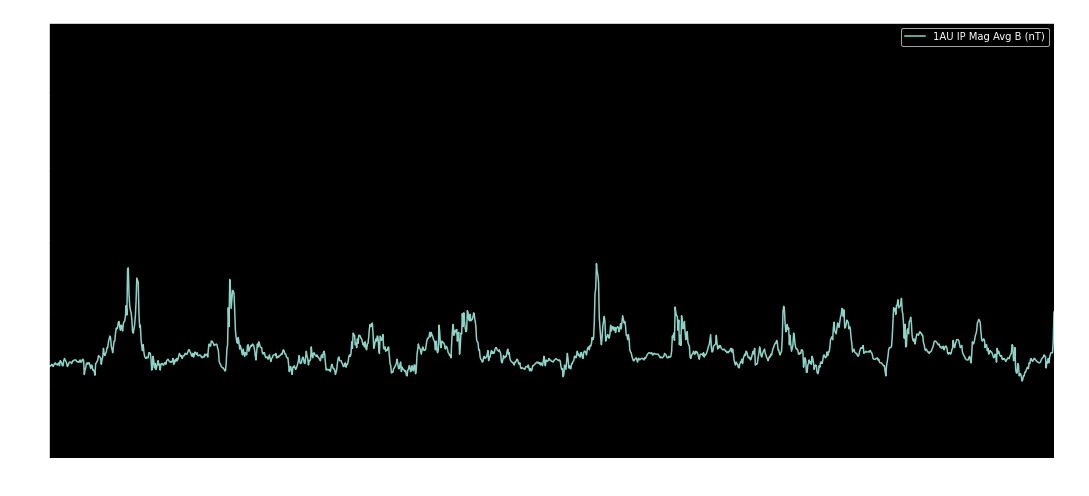

In [10]:
#Aplicando a função de plotagem criada anteriormente para variável ABS_B1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['ABS_B1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

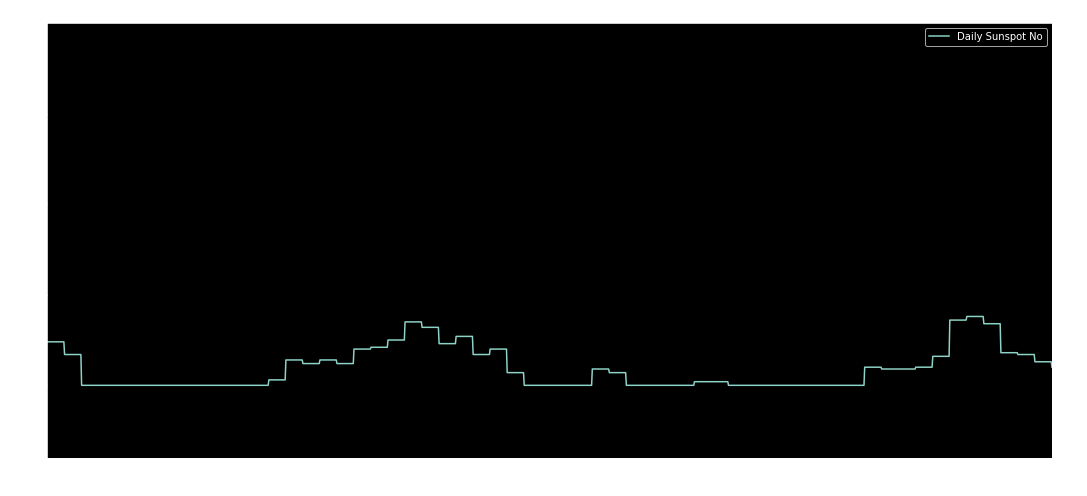

In [11]:
#Aplicando a função de plotagem criada anteriormente para variável R1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['R1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

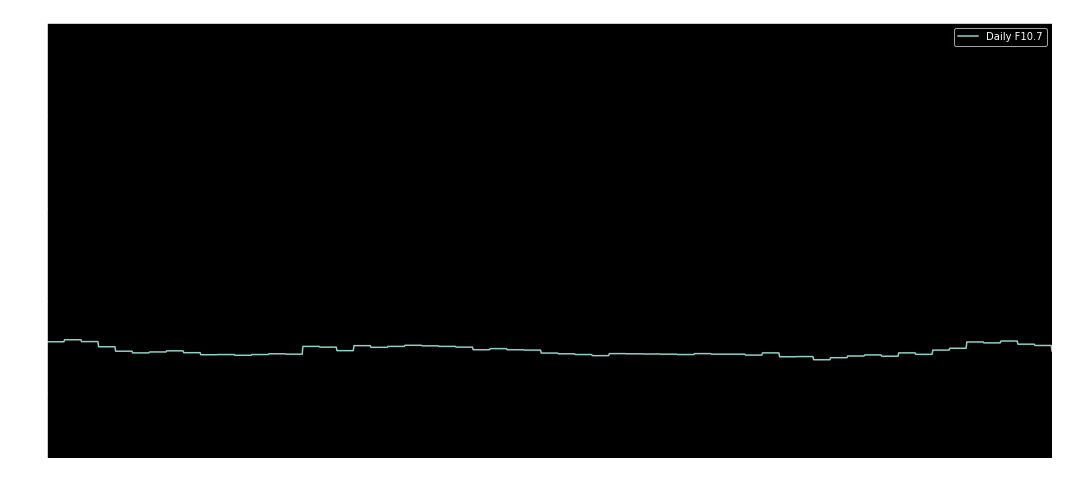

In [12]:
#Aplicando a função de plotagem criada anteriormente para variável F10_INDEX1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['F10_INDEX1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

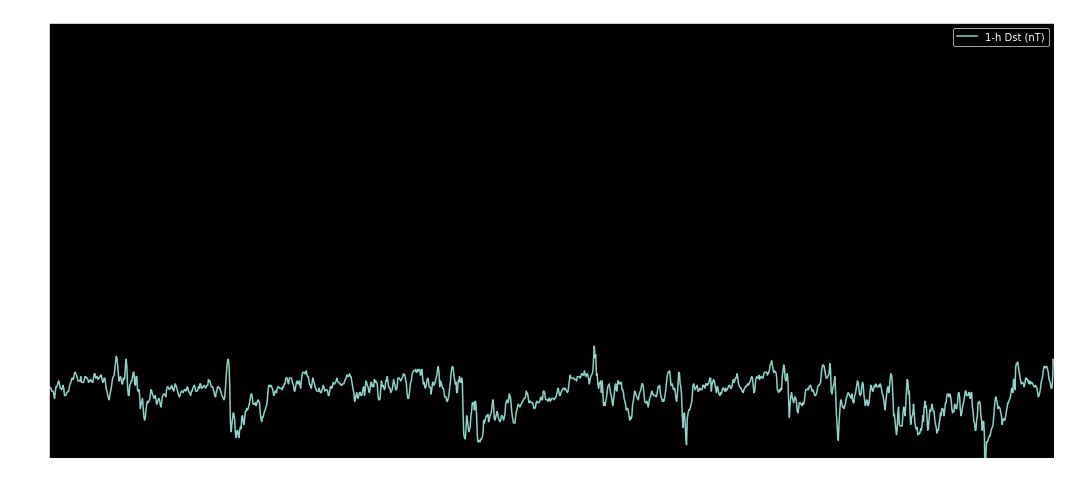

In [13]:
#Aplicando a função de plotagem criada anteriormente para variável DST1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['DST1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

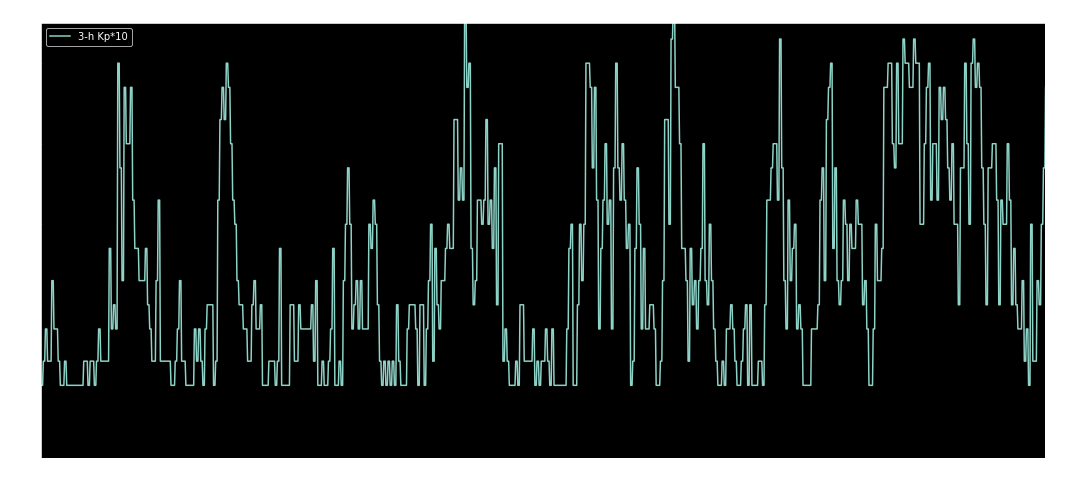

In [14]:
#Aplicando a função de plotagem criada anteriormente para variável KP1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['KP1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

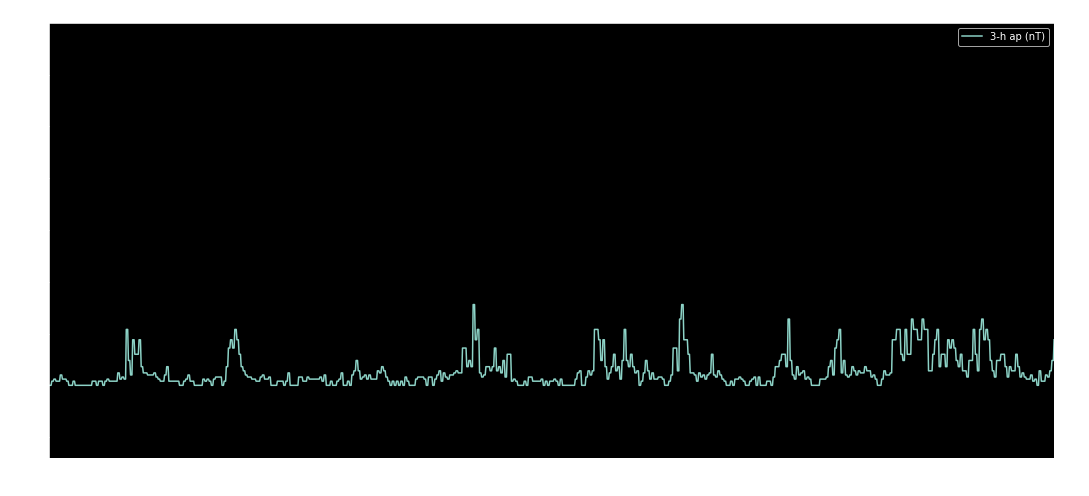

In [15]:
#Aplicando a função de plotagem criada anteriormente para variável AP_INDEX1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['AP_INDEX1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

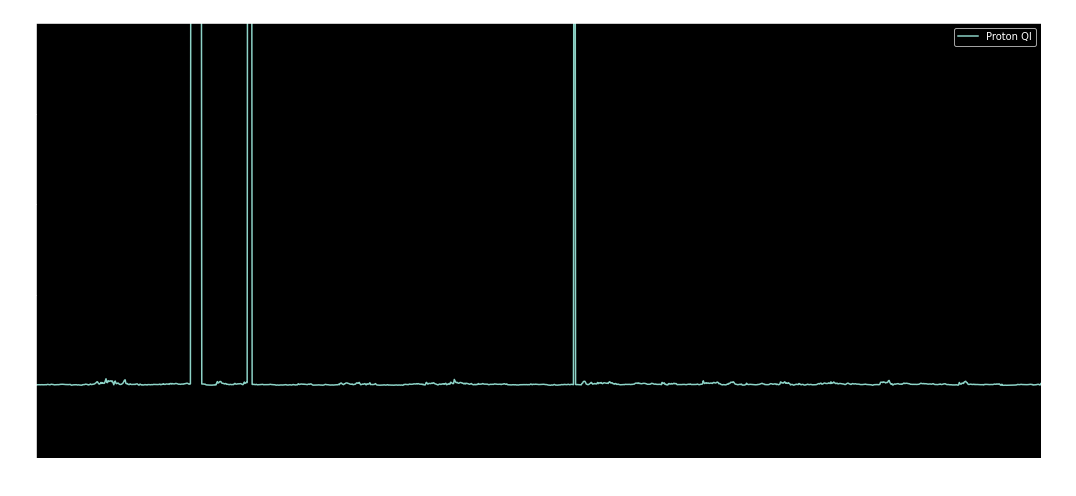

In [16]:
#Aplicando a função de plotagem criada anteriormente para variável Proton_QI1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de dois meses
Vet_var = ['Proton_QI1800']
#definindo o intervalo de tempo a ser plotado para dois meses
time = [datetime.datetime(2021, 1, 1,0,0,0),datetime.datetime(2021, 3, 1,0,0,0)]
datax = data_OMNI['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI, datax, time)

##### Após observarmos o comportamento dos dados, é possível perceber que suas escalas são bem diferentes, desse modo para futuros modelos isso deve ser ajustado, também se percebe que alguns dados possuem comportamentos parecidos. Para ter certeza de que dados apresentam comportamentos similares vamos observar as correlações entre os dados. Pra isso, iremos criar um dataframe do pandas e posteriormente um mapa de calor do seaborn.

In [177]:
dataset_OMINI.corr()

""


In [17]:
# Criando o pandas dataframe com os dados do dataset OMNI2_H0_MRG1HR
dataset_OMINI = pd.DataFrame([data_OMNI['Proton_QI1800'],data_OMNI['AP_INDEX1800'],data_OMNI['KP1800'],
              data_OMNI['DST1800'],data_OMNI['F10_INDEX1800'],data_OMNI['R1800'],data_OMNI['ABS_B1800']]).T
dataset_OMINI.columns = ['Proton_QI1800','AP_INDEX1800','KP1800','DST1800','F10_INDEX1800','R1800','ABS_B1800']
dataset_OMINI

,Proton_QI1800,AP_INDEX1800,KP1800,DST1800,F10_INDEX1800,R1800,ABS_B1800
0,0.0055,0.0,0.0,-1.0,77.699997,24.0,2.6
1,0.0059,0.0,0.0,-2.0,77.699997,24.0,2.7
2,0.0062,0.0,0.0,-2.0,77.699997,24.0,2.7
3,0.0074,2.0,3.0,-4.0,77.699997,24.0,2.9
4,0.0070,2.0,3.0,-4.0,77.699997,24.0,2.8
...,...,...,...,...,...,...,...
8756,0.0087,3.0,7.0,14.0,98.199997,62.0,4.9
8757,0.0085,4.0,10.0,19.0,98.199997,62.0,5.1
8758,0.0100,4.0,10.0,17.0,98.199997,62.0,5.4
8759,0.0225,4.0,10.0,15.0,98.199997,62.0,6.8


,Proton_QI1800,AP_INDEX1800,KP1800,DST1800,F10_INDEX1800,R1800,ABS_B1800
Proton_QI1800,1.000000,0.001287,0.000338,0.050430,-0.001236,0.007379,0.902505
AP_INDEX1800,0.001287,1.000000,0.845584,-0.434490,-0.023954,0.018438,0.017419
KP1800,0.000338,0.845584,1.000000,-0.427958,-0.035815,0.053379,0.018660
DST1800,0.050430,-0.434490,-0.427958,1.000000,0.073980,0.026374,0.040475
F10_INDEX1800,-0.001236,-0.023954,-0.035815,0.073980,1.000000,0.189510,-0.000193
R1800,0.007379,0.018438,0.053379,0.026374,0.189510,1.000000,0.005572
ABS_B1800,0.902505,0.017419,0.018660,0.040475,-0.000193,0.005572,1.000000


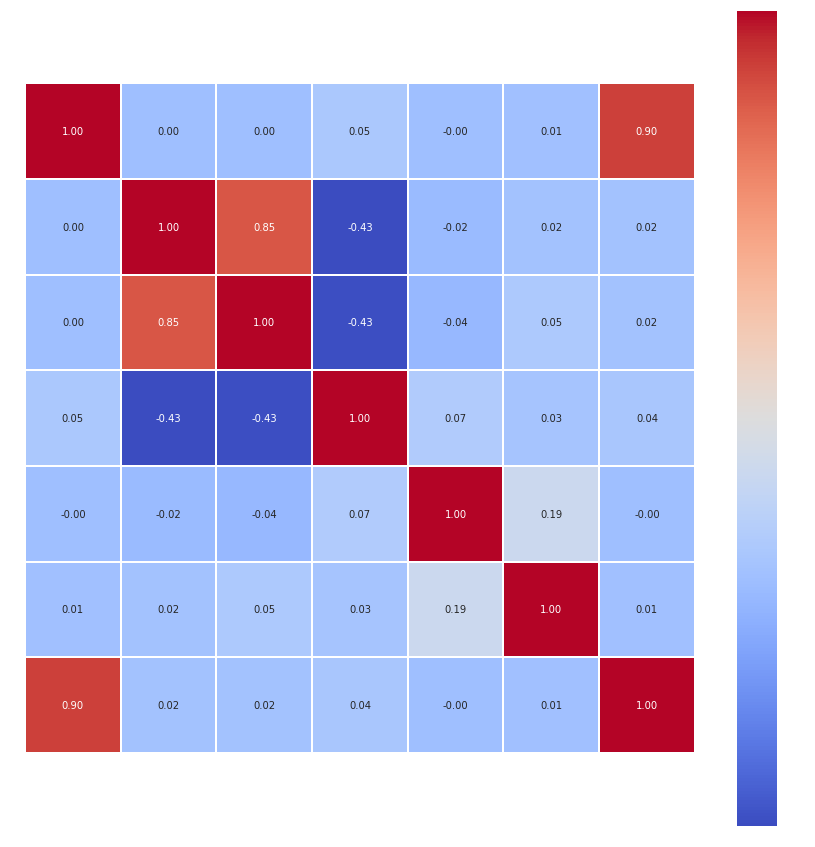

In [18]:
# correlação entre as variáveis e mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(dataset_OMINI.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

plt.xticks(range(dataset_OMINI.shape[1]), dataset_OMINI.columns, rotation=90)
plt.yticks(range(dataset_OMINI.shape[1]), dataset_OMINI.columns)
dataset_OMINI.corr()

##### A partir da informação anterior podemos dizer quais variáveis possuem relações matemáticas (positivas ou negativas). Precisamos lembrar também que correlação não implica em causalidade, logo mesmo que a correlação seja alta isso não quer dizer que uma variável realmente afeta a outra, mas podemos afirmar que elas possuem comportamentos de crescimento ou decrescimento equivalentes.

##### Agora vamos trabalhar com os dados como serie temporal e vamos realizar algumas decomposições dos dados para explorar as características temporais básicas.

In [19]:
# Adicionando a coluna temporal aos dados e definindo ela como índice
dataset_OMINI['Epoch_1800'] = list(data_OMNI['Epoch_1800'])
dataset_OMINI.set_index(dataset_OMINI['Epoch_1800'], inplace=True)
dataset_OMINI.drop('Epoch_1800', axis=1, inplace=True)

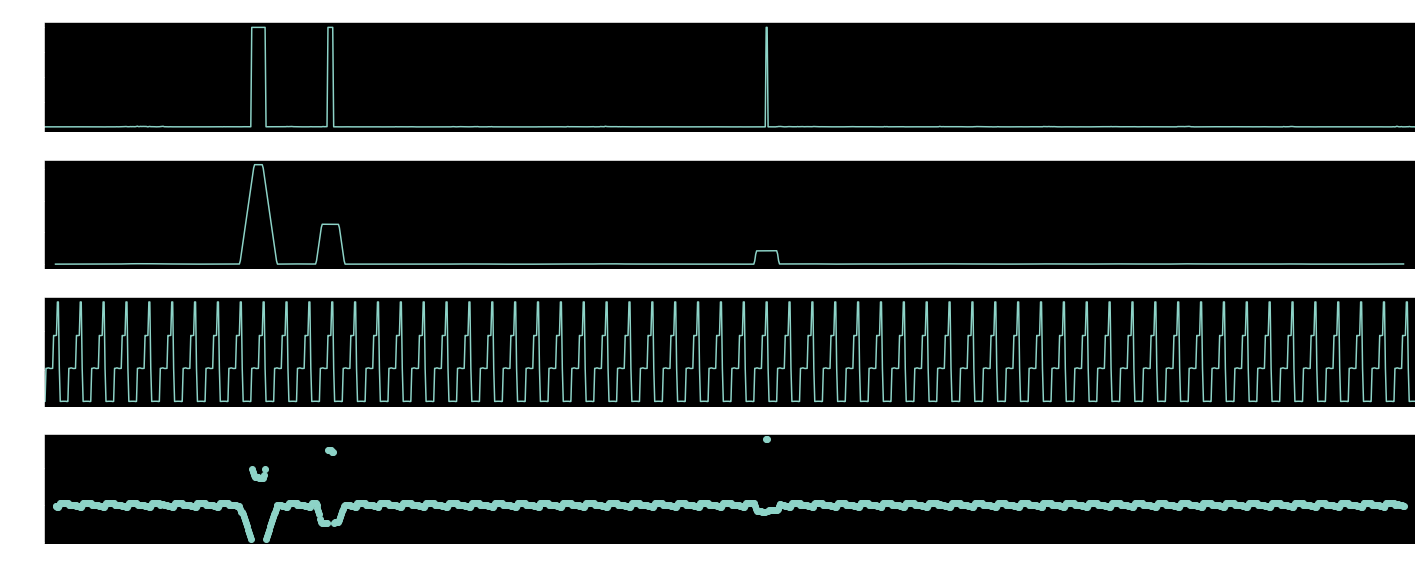

In [20]:
#Decompondo a série temporal automaticamente para Proton_QI1800 no período de dois meses
result_Proton_QI1800 = seasonal_decompose(dataset_OMINI['Proton_QI1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_Proton_QI1800.plot()
pyplot.show()

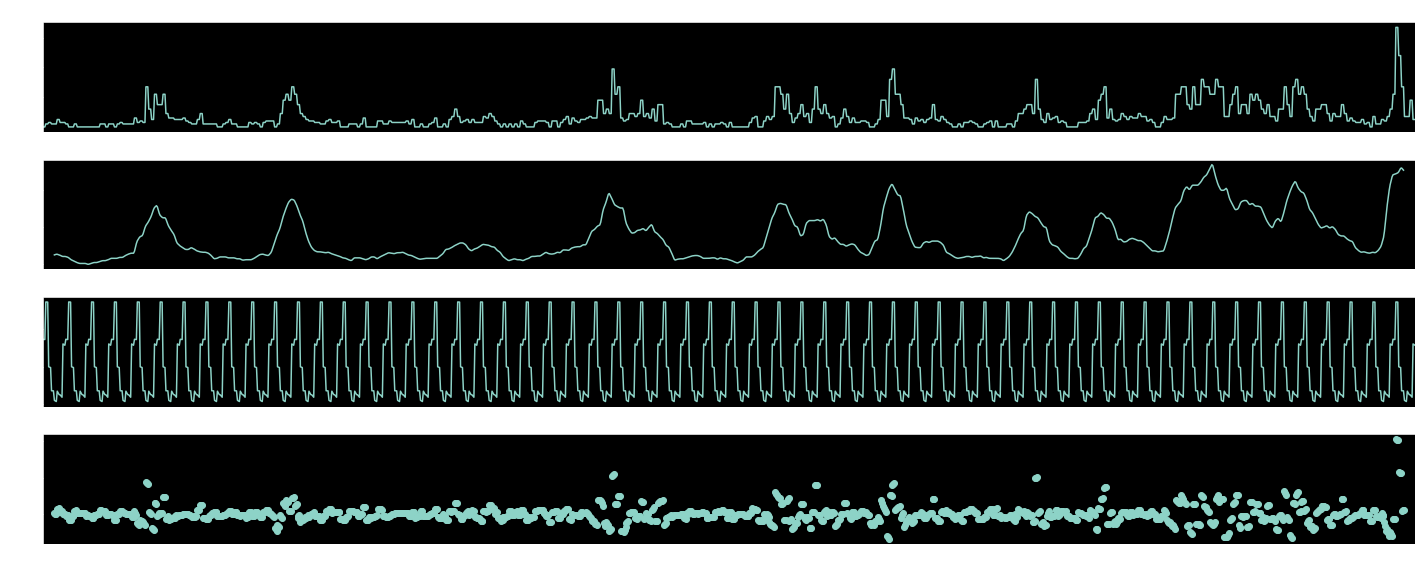

In [21]:
#Decompondo a série temporal automaticamente para AP_INDEX1800 no período de dois meses
result_AP_INDEX1800 = seasonal_decompose(dataset_OMINI['AP_INDEX1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_AP_INDEX1800.plot()
pyplot.show()

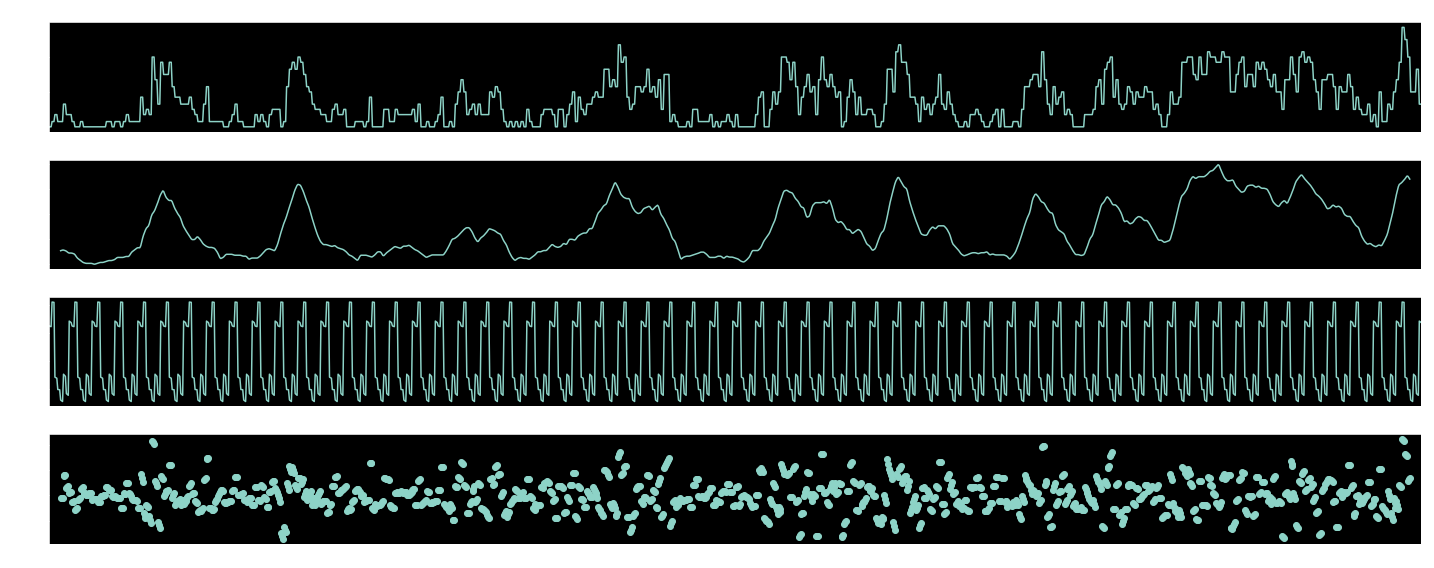

In [22]:
#Decompondo a série temporal automaticamente para KP1800 no período de dois meses
result_KP1800 = seasonal_decompose(dataset_OMINI['KP1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_KP1800.plot()
pyplot.show()

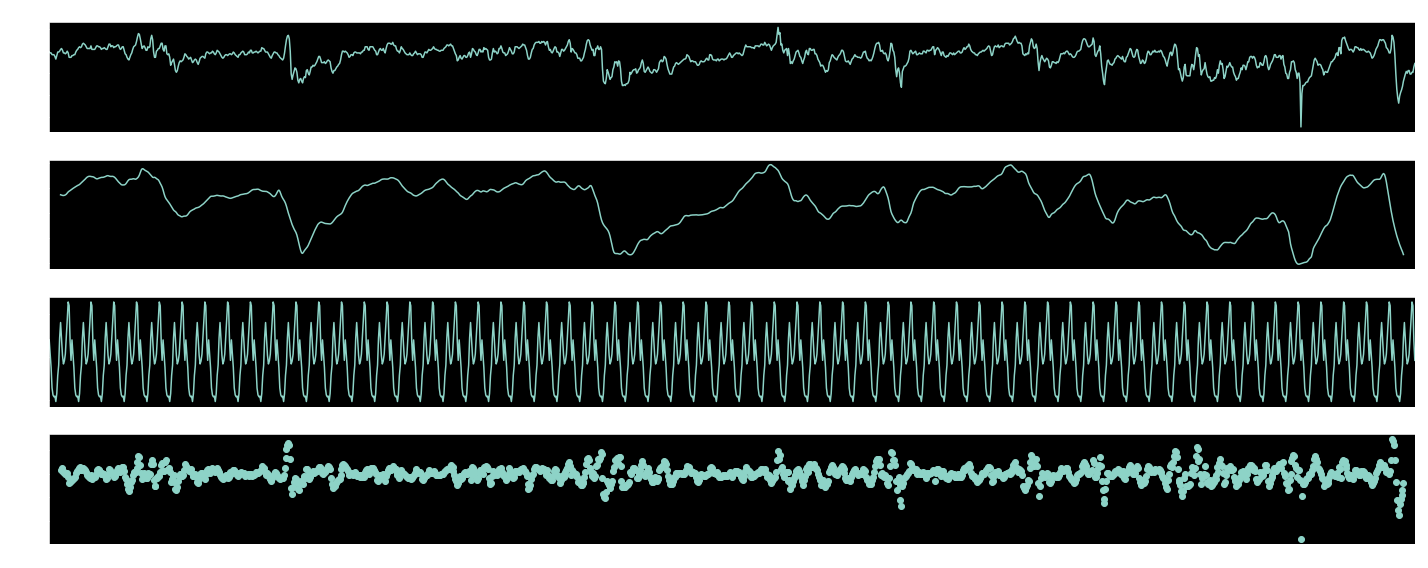

In [23]:
#Decompondo a série temporal automaticamente para DST1800 no período de dois meses
result_DST1800 = seasonal_decompose(dataset_OMINI['DST1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_DST1800.plot()
pyplot.show()

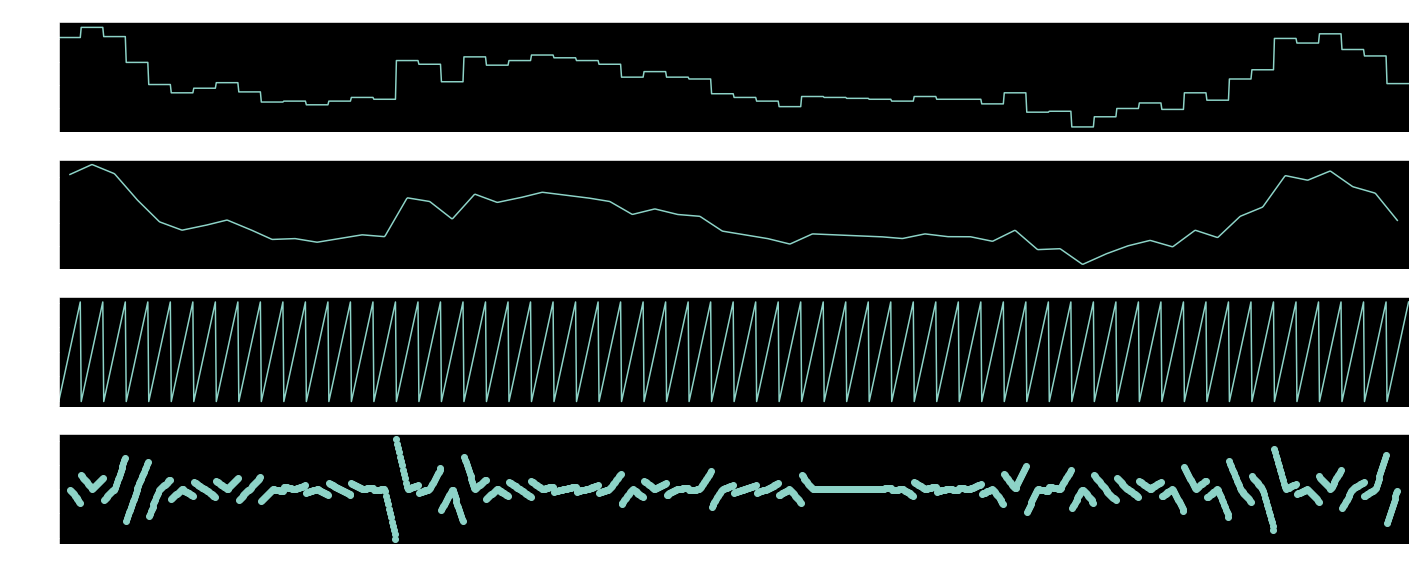

In [24]:
#Decompondo a série temporal automaticamente para F10_INDEX1800 no período de dois meses
result_F10_INDEX1800 = seasonal_decompose(dataset_OMINI['F10_INDEX1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_F10_INDEX1800.plot()
pyplot.show()

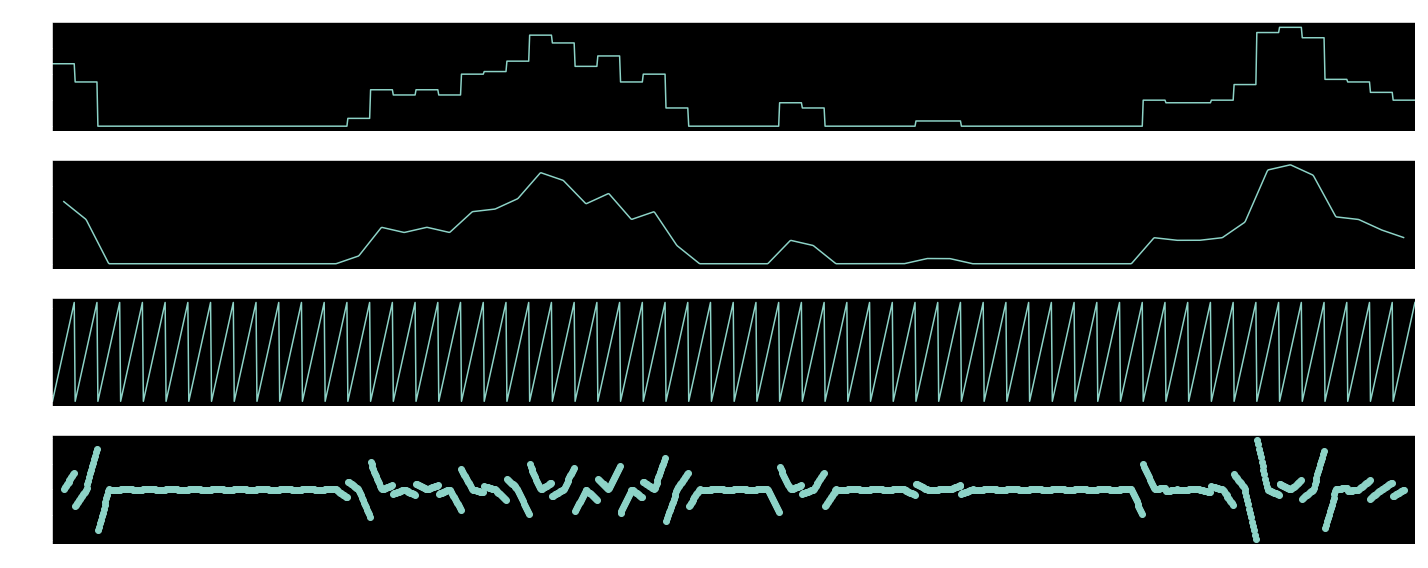

In [25]:
#Decompondo a série temporal automaticamente para R1800 no período de dois meses
result_R1800 = seasonal_decompose(dataset_OMINI['R1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_R1800.plot()
pyplot.show()

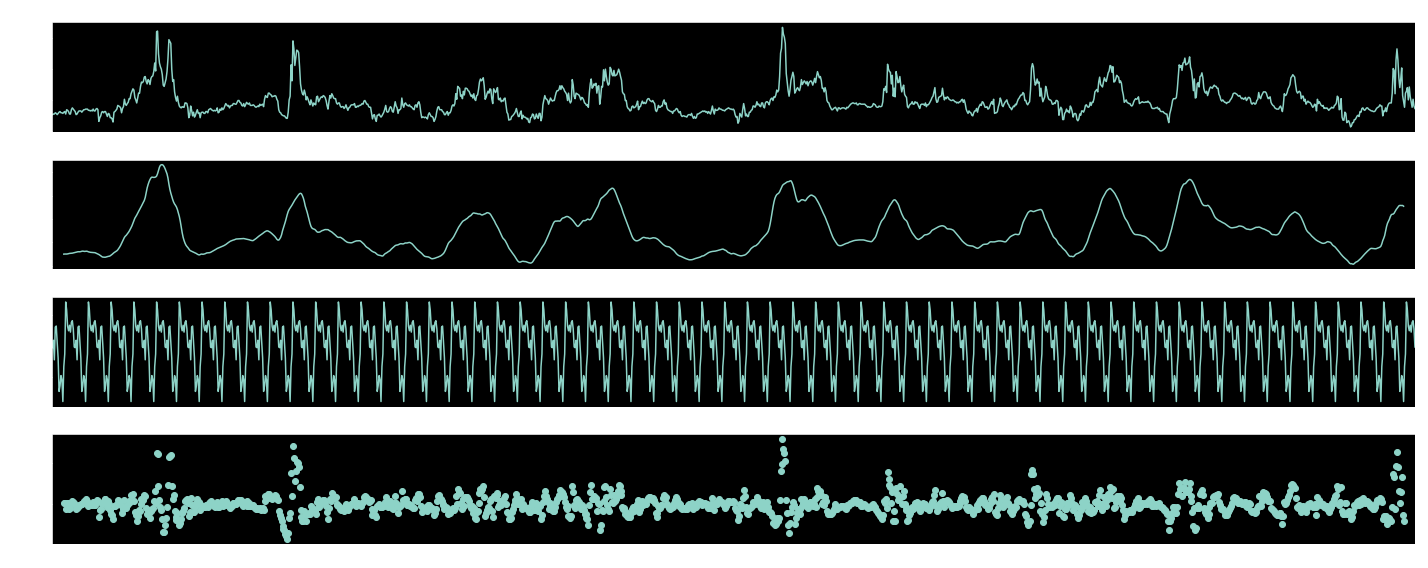

In [26]:
#Decompondo a série temporal automaticamente para ABS_B1800 no período de dois meses
result_ABS_B1800 = seasonal_decompose(dataset_OMINI['ABS_B1800'][0:1440], model= 'additive' )
pylab.rcParams['figure.figsize'] = (20, 8)
result_ABS_B1800.plot()
pyplot.show()

##### Após a decomposição realizadas, é possível perceber que todos os dados possuem uma sazonalidade diária. Essa identificação é importante para o entendimento do comportamento dos dados, posteriormente ela será considerada para o tratamento dos dados para posteriormente ser criado um modelo preditivo para cada uma das variáveis. Podemos perceber também que as tendências de variação para cada uma das variáveis segue um padrão, com exceção da "Proton_QI1800", porem esses padrões não seguem uma correlação direta, alguns seguem uma correlação inversa, o que é consistente com o que vimos no mapa de calor. Com isso podemos começar a fazer tratamento nesses dados, a partir das informações que conseguimos extrair, para posteriormente criarmos os modelos para projeção dos dados futuros. Nos próximos notebooks iremos realizar esse tratamento.